In [1]:
'''
Editor:hyunhomo

Create own time series dataset of temperature with random number generator
Data period is assumed as two years from Jan 2018 to Jan 2020, and the number of instances in the dataset should 
be around 1 million with assuming the data collected in every minute (or sampling rate of 1 minute)
'''
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle


### Create pandas DataFrame 

## Function to derive current time with the format of pandas timestamp '%Y-%m-%d %H:%M:00' 
def current_time():
    ct = datetime.now()
    ct_minute = ct.strftime('%Y-%m-%d %H:%M:00')
#     ct_ts = pd.to_datetime(ct_minute)
    ct_ts = pd.Timestamp(ct_minute, freq='t')
    return ct_ts

## Generate a fixed frequency DatetimeIndex
print ('Generating DatetimeIndex...')
date_idx = pd.date_range(start='1/31/2018', end='2/28/2020', freq='min')
print ('DatetimeIndex generated')
print ("date_idx", date_idx)
print ("type(date_idx)",type(date_idx))
print ("len(date_idx)",len(date_idx))

# Set current time(minute) as the threshold for training/test dataset split 
current_minute = current_time()
threshold_dates = [[date_idx[0],current_minute ],
                   [current_minute, date_idx[-1]]]

for last_train_date, first_test_date in threshold_dates:
    print (last_train_date)
    print(first_test_date)


print ("current_minute", current_minute)
print ("Total number of instances", len(date_idx))
print ("The number of training instances", np.where(date_idx==current_minute)[0][0]+1)
print ("The number of test instances", len(date_idx) - (np.where(date_idx==current_minute)[0][0]+1) )





Generating DatetimeIndex...
DatetimeIndex generated
date_idx DatetimeIndex(['2018-01-31 00:00:00', '2018-01-31 00:01:00',
               '2018-01-31 00:02:00', '2018-01-31 00:03:00',
               '2018-01-31 00:04:00', '2018-01-31 00:05:00',
               '2018-01-31 00:06:00', '2018-01-31 00:07:00',
               '2018-01-31 00:08:00', '2018-01-31 00:09:00',
               ...
               '2020-02-27 23:51:00', '2020-02-27 23:52:00',
               '2020-02-27 23:53:00', '2020-02-27 23:54:00',
               '2020-02-27 23:55:00', '2020-02-27 23:56:00',
               '2020-02-27 23:57:00', '2020-02-27 23:58:00',
               '2020-02-27 23:59:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', length=1091521, freq='T')
type(date_idx) <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
len(date_idx) 1091521
2018-01-31 00:00:00
2020-01-22 10:24:00
2020-01-22 10:24:00
2020-02-28 00:00:00
current_minute 2020-01-22 10:24:00
Total number of instances 1091521
The n

df_Temp                        date
0       2018-01-31 00:00:00
1       2018-01-31 00:01:00
2       2018-01-31 00:02:00
3       2018-01-31 00:03:00
4       2018-01-31 00:04:00
...                     ...
1091516 2020-02-27 23:56:00
1091517 2020-02-27 23:57:00
1091518 2020-02-27 23:58:00
1091519 2020-02-27 23:59:00
1091520 2020-02-28 00:00:00

[1091521 rows x 1 columns]
[20.17800997 19.65062479 19.67562921 ... 19.88769226 20.23506811
 21.13579494]
1
109152.1
2
10915.21
3
1091.521
4
109.1521
max 26.15688249521603
min 14.232772985180393
mean 19.996610067096622
std 0.8612751945560354
The number of abnormal(cold) 2227
The number of abnormal(hot) 2239


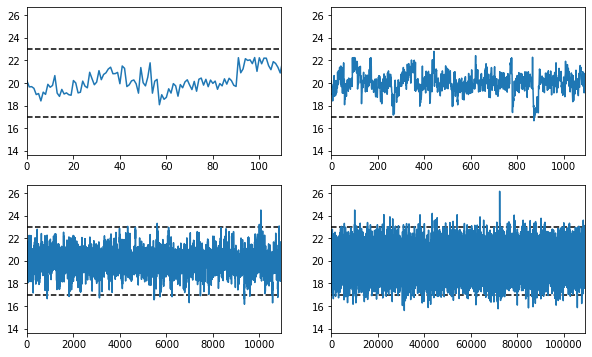

In [2]:
'''
def generate_pattern_data(length=100, avg_pattern_length=5, avg_amplitude=1,
                          default_variance=1, variance_pattern_length=10, variance_amplitude=2,
                          generators=std_generators, include_negatives=True):
'''
from synth_ts_data import generate_bell
from synth_ts_data import generate_funnel
from synth_ts_data import generate_cylinder

from synth_ts_data import generate_pattern_data



## Create DataFrame and assign DatetimeIndex

df_Temp = pd.DataFrame(date_idx, columns=['date'])
print ("df_Temp", df_Temp)

num_instance = len(date_idx)
std_generators = [generate_bell, generate_funnel, generate_cylinder]
Temp_data = generate_pattern_data(length=num_instance, avg_pattern_length=5, avg_amplitude=0.5, generators=std_generators, 
                          default_variance=0.5, variance_pattern_length=10, variance_amplitude=1, include_negatives=True)

#add offset
Temp_data = Temp_data+20

print (Temp_data)

plt.figure(figsize=(10,6))

for i in range(1, 5):
    print (i)
    
    ax = plt.subplot(2, 2, 5-i)
    xmax = num_instance / (10**i)
    print (xmax)
    ax.set_xlim([0,xmax])
    ax.plot(Temp_data)

    plt.hlines(23, xmin = 0, xmax = xmax, linestyles='dashed', )
    plt.hlines(17, xmin = 0, xmax = xmax, linestyles='dashed', )

    
    

# plt.plot(x=[0,10], Temp_data)
# plt.hlines(23, xmin = 0, xmax = num_instance, linestyles='dashed', )
# plt.hlines(17, xmin = 0, xmax = num_instance, linestyles='dashed', )

print("max", max(Temp_data))
print("min", min(Temp_data))
print("mean", np.mean(Temp_data))
print("std",np.std(Temp_data))
print ("The number of abnormal(cold)", np.sum(Temp_data < 17))
print ("The number of abnormal(hot)", np.sum(Temp_data > 23))

In [3]:
##  Assign temperature values into DataFrame with the column name 'temperature'
df_Temp['temperature'] = Temp_data
print (df_Temp)


# Generate label indicator and assign it
# Indicator = np.zeros (len(Temp_data) , dtype = object)

# Indicator[((Temp_data>=18) & (Temp_data<=22)) ] = 'normal'
# print ("Indicator", Indicator)
# Indicator[Temp_data<18] = 'abnormal(cold)'
# Indicator[Temp_data>22] ='abnormal(hot)'

# print ("Indicator", Indicator)
# print (np.sum([Indicator == 'normal']))
# print (np.sum([Indicator == 'abnormal(cold)']))
# print (np.sum([Indicator == 'abnormal(hot)']))
# df_Temp['indicator'] = Indicator


df_Temp.to_csv('ts_temperature.csv', index=False)
print ("csv file saved")

                       date  temperature
0       2018-01-31 00:00:00    20.178010
1       2018-01-31 00:01:00    19.650625
2       2018-01-31 00:02:00    19.675629
3       2018-01-31 00:03:00    19.525535
4       2018-01-31 00:04:00    18.975008
...                     ...          ...
1091516 2020-02-27 23:56:00    19.326500
1091517 2020-02-27 23:57:00    20.072470
1091518 2020-02-27 23:58:00    19.887692
1091519 2020-02-27 23:59:00    20.235068
1091520 2020-02-28 00:00:00    21.135795

[1091521 rows x 2 columns]
csv file saved
